[7.743149365671448, 7.683752467074113, 7.484692590693856, 7.442151568725495, 7.388373295671151, 6.814470829494202, 4.790160312433692, 4.2965239254423295, 4.264417493768095, 4.083016154808668, 4.054120366301856, 3.9698409831569883, 3.8277700229985, 3.798874234491688, 7.499943145739118, 7.446164872684775, 6.808852203951211, 4.754843237592032, 4.874439695578558, 4.8776503387459815, 4.89530887616681, 4.900124840917946, 3.9377345514827535]


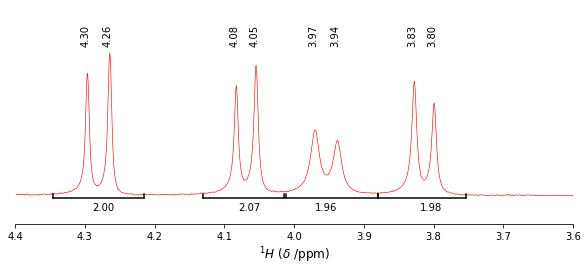

In [76]:
#! /usr/bin/env python
# Create a plot of overlayed 2D spectra

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import nmrglue as ng
import numpy as np

def draw_inset(co_or, z_x, z_y):
    ax_temp = fig.add_axes(co_or)
    #ax_temp.spines['top'].set_color('white')
    #ax_temp.spines['left'].set_color('white')
    #ax_temp.spines['right'].set_color('white')
    ax_temp.axes.get_yaxis().set_visible(False)
    ax_temp.plot(ppm_scale, data, 'red' , linewidth =0.6)
    ax_temp.set_xlim(z_x[0], z_x[1])
    ax_temp.set_ylim(z_y[0], z_y[1])
    width=z_x[0]-z_x[1]
    height=0.8*z_y[1]
    rect = patches.Rectangle((z_x[1],z_y[0]), width, height, linewidth=1, edgecolor='k', facecolor='none', zorder=10)
    line1 = patches.ConnectionPatch((z_x[1],z_y[0]), (z_x[1],z_y[0]+height), coordsA='data', coordsB='data',
                                    axesA=ax_temp, axesB=ax1, color="black")
    line2 = patches.ConnectionPatch((z_x[0],z_y[0]), (z_x[0],z_y[0]+height), coordsA='data', coordsB='data',
                                    axesA=ax_temp, axesB=ax1, color="black")
    ax1.add_patch(rect)
    ax1.add_artist(line1)
    ax1.add_artist(line2)
    return ax_temp

def draw_integration_ticks(axtemp, x, y):
    x1,x2= x
    y1,y2= y
    axtemp.plot((x1,x1),(y1,y2),'k')
    axtemp.plot((x1,x2),(y2,y2),'k')
    axtemp.plot((x2,x2),(y1,y2),'k')

fname = "C:/Users/User/Desktop/NMR/500/AS-7-96-500/15/pdata/1"
dic, data = ng.bruker.read_pdata(fname)

udic = ng.bruker.guess_udic(dic, data)
uc0 = ng.fileiobase.uc_from_udic(udic)
ppm_scale = uc0.ppm_scale()

limit_x1=[4.4,3.6]
limit_y1=[-1.5e9,1e10]
#limit_y2=[-1e9,1e10]
label_x = '$^{1}H$'+' '+'$(\delta$'+' '+'/ppm)'

fig = plt.figure(figsize=(10,4),constrained_layout=False)

ax1 = fig.add_subplot(111)
ax1.plot(ppm_scale, data, 'red' , linewidth =0.6, zorder=1)
ax1.set_xlim(limit_x1[0], limit_x1[1])
ax1.set_ylim(limit_y1[0], limit_y1[1])

# Decorate
# Remove spines or the box around the plot (but leave the x-axis line)
ax1.spines['top'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.axes.get_yaxis().set_visible(False) # Remove y-axis
ax1.set_xlabel(label_x, fontsize=12) # Label the x-axis

peak_table = ng.peakpick.pick(data, thres, table=False, algorithm='downward')
peaks=[]
for each in peak_table[0]:
    peaks.append(ppm_scale[each])
print(peaks)

peaks_ax1 = [4.2965239254423295, 4.264417493768095, 
             4.083016154808668, 4.054120366301856, 
             3.9698409831569883, 3.9377345514827535,
             3.8277700229985, 3.798874234491688]
int_ax1 = [2.0000,2.0745,1.9583,1.9784]
label_integration_ax1 = [4.29,4.08,3.97,3.82]
int_ticks= [(4.346,4.215),(4.1303,4.0145),(4.012,3.8795),(3.8795,3.7537)]

for p in peaks_ax1:
    ax1.text(p+0.01, 8e9, "{:0=3.2f}".format(p), rotation=90, fontsize = 10)

for i, l in zip(int_ax1, label_integration_ax1):
    ax1.text(l, -8e8, "{:0=3.2f}".format(i), fontsize = 10)

for each in int_ticks:
    y_limit = (1e8,-1e8)
    draw_integration_ticks(ax1, each, y_limit)

#text = 'HDO at 4.79 ppm'
#ax1.text(5.2, limit_y[1]-750000, text)

plt.show()
fig.savefig('MS124_1H_zoom_aliphatic.png', dpi=120, bbox_inches='tight', pad_inches=0)